### Imports


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Reading the csv file

In [6]:
csv_file = 'dados_preparados.csv'
df = pd.read_csv(csv_file)
df.head()

,#_x,id,Ano Ingresso,Per. Ingresso,Curso,Forma de Ingresso,Tipo de Cota,Sigla Cota,Escola Pública?,Coeficiente,...,Cod. Disciplina,Nome Disciplina,Per. Aluno,Ano Lanç.,Per. Lanç.,Nota,Freq.(%),Situação Disc.,Média da Turma,Qtde Alunos Turma
0,1,+bwsow,2010,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Cotista,Escola Pública,0.0222,...,CC31C,INTRODUÇÃO À CIÊNCIA DA COMPUTAÇÃO,1.0,2010.0,1.0,0.0,23.5,Reprovado por Nota/Frequência,6.0,46.0
1,1,+bwsow,2010,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Cotista,Escola Pública,0.0222,...,CC31B,LÓGICA MATEMÁTICA,1.0,2010.0,1.0,0.0,71.1,Reprovado por Nota/Frequência,5.4,46.0
2,1,+bwsow,2010,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Cotista,Escola Pública,0.0222,...,CC31A,ALGORITMOS,1.0,2010.0,1.0,0.0,35.4,Reprovado por Nota/Frequência,5.7,45.0
3,1,+bwsow,2010,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Cotista,Escola Pública,0.0222,...,CC31G,GEOMETRIA ANALÍTICA E ÁLGEBRA LINEAR,1.0,2010.0,1.0,1.0,16.2,Reprovado por Nota/Frequência,2.6,46.0
4,1,+bwsow,2010,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Cotista,Escola Pública,0.0222,...,CC31D,CÁLCULO DIFERENCIAL E INTEGRAL 1,1.0,2010.0,1.0,0.0,47.6,Reprovado por Nota/Frequência,3.2,46.0


### Creating a Pandas dataframe

TODO: normalização dos dados (sklearn.preprocessing.StandardScaler)

In [7]:
df = df[['Nota', 'Média da Turma', 'Qtde Alunos Turma', 'Situação Atual do Aluno', 'Período do Aluno', 'Sigla Cota']]
df = df.dropna()
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['Sigla Cota'] = df['Sigla Cota'].apply(lambda valor: 0 if valor == 'Não cotista' else 1)
y = df['Situação Atual do Aluno']
y = y.apply(lambda valor: 0 if valor == 'Desistente' else 1)
x = df[['Nota', 'Média da Turma', 'Qtde Alunos Turma', 'Período do Aluno', 'Sigla Cota']]

### Splitting train and test

TODO: melhorar o data split -> sklearn.model_selection.train_test_split

In [8]:
x_treino, x_teste = x[0:10000], x[10000:12500]
y_treino, y_teste = y[0:10000], y[10000:12500]

### Function for testing the models

In [9]:
def fit_neural_network(model):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    resultado = model.fit(x_treino, y_treino, epochs=50, batch_size=32, validation_data=(x_teste, y_teste))

    plt.plot(resultado.history['loss'])
    plt.plot(resultado.history['val_loss'])
    plt.title('Histórico de Treinamento')
    plt.ylabel('Função de custo')
    plt.xlabel('Épocas de treinamento')
    plt.legend(['Erro treino', 'Erro teste'])
    plt.show()

    return resultado

### Simple neural network

Epoch 1/50


/home/danilo/Repos/DataMining/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-21 22:29:28.544134: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4779 - loss: 1.3973 - val_accuracy: 0.5596 - val_loss: 0.5995
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6280 - loss: 0.5864 - val_accuracy: 0.6776 - val_loss: 0.5304
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6850 - loss: 0.5401 - val_accuracy: 0.7720 - val_loss: 0.4885
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7756 - loss: 0.4891 - val_accuracy: 0.7956 - val_loss: 0.4523
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7907 - loss: 0.4579 - val_accuracy: 0.8116 - val_loss: 0.4215
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8076 - loss: 0.4286 - val_accuracy: 0.8220 - val_loss: 0.3976
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8151 - loss: 0.4079 - val_accuracy: 0.8260 - val_loss: 0.3795
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.4042 - val_accuracy: 0.8296 - val_

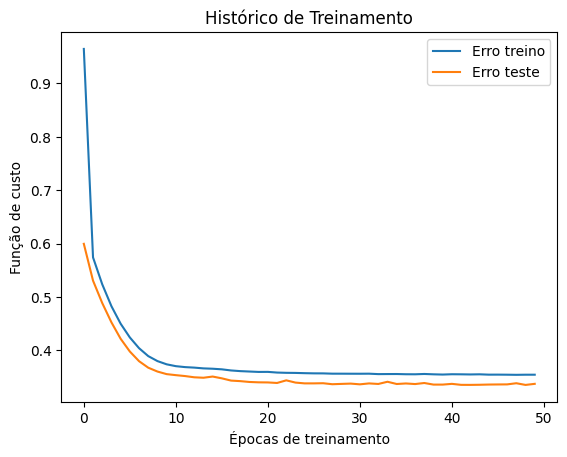

In [10]:
simple = Sequential()
simple.add(Dense(units=3, activation='relu', input_dim=x_treino.shape[1]))
simple.add(Dense(units=1, activation='sigmoid'))

fit_neural_network(simple)

### Deep neural network

Epoch 1/50


/home/danilo/Repos/DataMining/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5490 - loss: 1.4595 - val_accuracy: 0.6816 - val_loss: 0.5127
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6815 - loss: 0.5747 - val_accuracy: 0.6816 - val_loss: 0.4647
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6920 - loss: 0.5108 - val_accuracy: 0.8268 - val_loss: 0.4414
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7409 - loss: 0.4928 - val_accuracy: 0.8360 - val_loss: 0.4066
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7797 - loss: 0.4620 - val_accuracy: 0.8384 - val_loss: 0.3853
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7931 - loss: 0.4439 - val_accuracy: 0.8376 - val_loss: 0.3772
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7948 - loss: 0.4534 - val_accuracy: 0.8336 - val_loss: 0.3715
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4356 - val_accuracy: 0.8368 - val

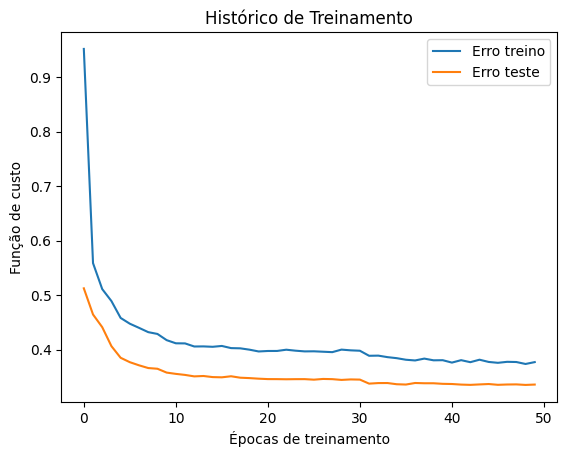

In [12]:
deep = Sequential()
deep.add(Dense(units=16, activation='relu', input_dim=x_treino.shape[1]))  # Primeira camada oculta
deep.add(Dropout(0.2))  # Regularização para evitar overfitting
deep.add(Dense(units=8, activation='relu'))  # Segunda camada oculta
deep.add(Dropout(0.2))  # Regularização
deep.add(Dense(units=1, activation='sigmoid')) # Camada de saída

fit_neural_network(deep)